In [424]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import matplotlib .pyplot as plt
import seaborn as sb
import pickle

In [41]:
df=pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [42]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [43]:
df=df.drop(["thall","slp","caa"],axis=1)

In [44]:
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,output
0,63,1,3,145,233,1,0,150,0,2.3,1
1,37,1,2,130,250,0,1,187,0,3.5,1
2,41,0,1,130,204,0,0,172,0,1.4,1
3,56,1,1,120,236,0,1,178,0,0.8,1
4,57,0,0,120,354,0,1,163,1,0.6,1
...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,0
299,45,1,3,110,264,0,1,132,0,1.2,0
300,68,1,0,144,193,1,1,141,0,3.4,0
301,57,1,0,130,131,0,1,115,1,1.2,0


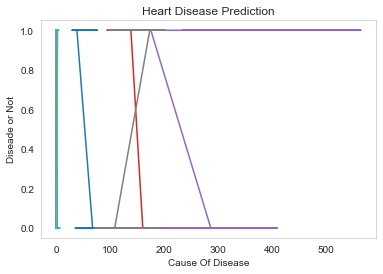

In [45]:
plt.title("Heart Disease Prediction")
plt.xlabel("Cause Of Disease")
plt.ylabel("Diseade or Not")
plt.grid(color="black")
plt.plot(x,y)

In [418]:
model=LogisticRegression()
model.fit(x,y)
from sklearn.model_selection import train_test_split
accuracy = []
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.2)
score = []

In [199]:
len(train_x),len(test_x),len(train_y),len(test_y)

(242, 61, 242, 61)

In [48]:
model.fit(train_x,train_y)

LogisticRegression()

In [49]:
test_y

104    1
244    0
273    0
99     1
270    0
      ..
58     1
162    1
37     1
134    1
63     1
Name: output, Length: 61, dtype: int64

In [50]:
model.predict([[63,1,3,145,233,1,0,150,0,2.3]])

array([1], dtype=int64)

In [419]:
acc=model.score(test_x,test_y)*100
accuracy.append(acc)
print('Test accuracy of Logistic Regression:',acc)

Test accuracy of Logistic Regression: 90.1639344262295


In [420]:
dc = DecisionTreeClassifier()
dc.fit(train_x,train_y)
scor = dc.score(test_x,test_y)*100
accuracy.append(scor)
print('Test accuracy of Decision Tree Classifier:',scor)

Test accuracy of Decision Tree Classifier: 75.40983606557377


In [421]:
svm = SVC(random_state=2)
svm.fit(train_x,train_y)
sc = svm.score(test_x,test_y)*100
accuracy.append(sc)
print('Test accuracy of Support vector machine:',sc)

Test accuracy of Support vector machine: 60.65573770491803


In [427]:
import pickle

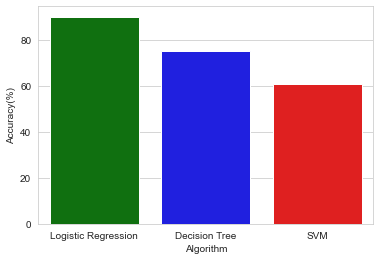

In [429]:
methods=['Logistic Regression','Decision Tree','SVM']
colors=['green','blue','red']
sb.set_style('whitegrid')
plt.ylabel("Accuracy(%)")
plt.xlabel('Algorithm')
sb.barplot(x=methods,y=accuracy,palette=colors)
plt.show()
